In [3]:
#Loading the Libraries
import cv2
from IPython.display import Video
import os, re
import numpy as np
import logging
import matplotlib.pyplot as plt
from PIL import Image
import shutil

In [1]:
video_dataset1_file = './Video_Dataset/Data_Source1/Videos/'
video_dataset1_frame = './Video_Dataset/Data_Source1/Frame/'
annotation_dataset1_file = './Video_Dataset/Data_source1/annotation/'
video_dataset2_file = './Video_Dataset/Data_Source2/Videos/'
video_dataset2_frame = './Video_Dataset/Data_Source2/Frame/'
annotation_dataset2_file = './Video_Dataset/Data_source2/Annotations/'
video_dataset4_file = './Video_Dataset/Data_Source4/Video/'
annotation_dataset4_file = './Video_Dataset/Data_Source4/annotations/'
clip1 = './Video_Dataset/Data_Source3/video/internet26.avi'
clip2 = './Video_Dataset/Test_Data/test_data_v2.mp4'
clip = 'C://Users//Admin/Intern/Video_Dataset/Test_Data/Test_Data.mp4'

In [4]:
cap = cv2.VideoCapture(clip)
length = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
print(length)

9609


### Trying to filter out annotations that are not drone related

In [ ]:
#Rewriting Annotation for video 12, to ensure that there is only one annotation in the frame
#For Data Source 3 video 12
Annotation_folder = './Video_Dataset/Data_Source3/annotations/annotations/'
for folders in os.listdir(Annotation_folder):
    for annotation in os.listdir(os.path.join(Annotation_folder, folders)):
        annotation_file = os.path.join(Annotation_folder, folders, annotation)
        print(annotation_file)
        file = open(annotation_file, "r")
        line_count = 0
        for line in file:
            if line != "\n":
                line_count += 1
        print(line_count)
        file.close()
        if line_count >=2 :
            info = []
            info1 = []
            info2 = []
            f = open(annotation_file, "r")
            for count,lines in enumerate(f):
                if count == 0:
                    words = lines.split()
                    for elements in words:
                        info1.append(elements)
                    #string = ' '.join([str(elem) for elem in words])
                    #info1.append(string)
                elif count == 1:
                    words = lines.split()
                    for elements in words:
                        info2.append(elements)
                    #string = ' '.join([str(elem) for elem in words])
                    #info2.append(string)
            f.close()
            #Open the same file again, but this time overwriting the old data with the new data
            fs = open(annotation_file, "w")
            print(info1)
            if float(info1[2]) < float(info2[2]):
                string = ' '.join([str(elem) for elem in info1]) 
                info.append(string)
                for elements in info:
                    fs.write(elements + "\n")
                fs.close()
            else:
                string = ' '.join([str(elem) for elem in info2]) 
                info.append(string)
                for elements in info:
                    fs.write(elements + "\n")
                fs.close()
        else:
            continue 

### Finding out which annotation file contain more than 1 annotation/Detection in the frames


In [ ]:
def detect_multiple_annotation(Annotation_folder):
    count = 0
    for folders in os.listdir(Annotation_folder):
        for annotation in os.listdir(os.path.join(Annotation_folder,folders)):
            annotation_file = os.path.join(Annotation_folder,folders,annotation)
            file = open(annotation_file, 'r')
            line_count = 0
            for lines in file:
                #If line is not empty(does not only contain \n)
                if lines != '\n':
                    line_count += 1
            file.close()
            #If file contain more than 1 annotations
            if line_count >=2:
                count += 1
                print(os.path.join(folders, annotation) + ' contains more than 1 annotation')
    if count == 0:
        print('hell yeah, u r done')
    else:
        print("Jiayou! u left with", count, "checks")
        

In [ ]:
#For Data Source 3
Annotation_folder = './Video_Dataset/Data_Source3/annotations/Annotation_folder/'
detect_multiple_annotation(Annotation_folder)

## Splitting the Video Annotation file into the invdividual Annotation file


In [ ]:
#For Data Source 1 and 2
for filename in os.listdir(annotation_dataset2_file):
    base_file_name = os.path.basename(filename)
    file_name = os.path.splitext(base_file_name)[0]
    folder_name = os.path.join(annotation_dataset2_file + file_name)
    #making folder
    try:
        #Creating a folder
        if not os.path.exists(folder_name):
            os.makedirs(folder_name)
        #Raise an error if folder is not created
    except OSError:
        logging.error('Error creating directory')
    f = open(annotation_dataset2_file + file_name + '.txt', "r")
    count = 0
    for lines in f:
        count += 1
        cord = re.findall(r'\(.*?\)', lines)
        new_file = open(folder_name + '/frame%s.txt' % count, "w+")
        for element in cord:
            element = re.sub('[()]','',element)
            element = element.replace(',',' ')
            new_file.write(element + "\n")
        new_file.close()

In [ ]:
# For data Source 4
for filename in os.listdir(annotation_dataset4_file):
    base_file_name = os.path.basename(filename)
    file_name = os.path.splitext(base_file_name)[0]
    folder_name = os.path.join(annotation_dataset4_file + file_name)
    #making folder
    try:
        #Creating a folder
        if not os.path.exists(folder_name):
            os.makedirs(folder_name)
        #Raise an error if folder is not created
    except OSError:
        logging.error('Error creating directory')
    f = open(annotation_dataset4_file + file_name + '.txt', "r")
    count = 0
    for lines in f:
        count += 1
        new_file = open(folder_name + '/frame%s.txt' % count, "w+")
        elements = lines.split()
        num_of_drones = int(elements[1])
        del elements[:2]
        if num_of_drones > 0 :
            split = np.array_split(elements, num_of_drones)
            for lists in split:
                list1 = lists.tolist()
                new_file.write(' '.join([str(elem) for elem in list1]) + "\n")
            new_file.close()
        else:
            new_file.close()
        

### Rewriting the frames annotation file to include height, width and sqaure area of bbox

In [ ]:
#For Data Source 1
Annotation_folders = './Video_Dataset/Data_source1/annotation/Annotation_folder'
for files in os.listdir(Annotation_folders):
    print(files)
    for annotation in os.listdir(os.path.join(Annotation_folders, files)):
        #Read the file to get the lines as data
        annotation_text = os.path.join(Annotation_folders,files,annotation)
        print(annotation_text)
        f = open(annotation_text, "r")
        info = []
        for lines in f:
            words = lines.split()
            ymin = int(words[0])
            xmin = int(words[1])
            ymax = int(words[2])
            xmax = int(words[3])
            width = xmax - xmin
            height = ymax - ymin
            area = width * height
            words.extend([width,height,area])
            string = ' '.join([str(elem) for elem in words])
            info.append(string)
        f.close()
        #Open the same file again, but this time overwriting the old data with the new data
        with open(annotation_text, "w") as fs:
            for elements in info:
                fs.write(elements + "\n")
            fs.close()


In [ ]:
#For Data Source 2
Annotation_folders = './Video_Dataset/Data_source2/Annotations/Annotation_folder'
for files in os.listdir(Annotation_folders):
    print(files)
    for annotation in os.listdir(os.path.join(Annotation_folders, files)):
        #Read the file to get the lines as data
        annotation_text = os.path.join(Annotation_folders,files,annotation)
        print(annotation_text)
        f = open(annotation_text, "r")
        info = []
        for lines in f:
            words = lines.split()
            ymin = int(words[0])
            xmin = int(words[1])
            ymax = int(words[2])
            xmax = int(words[3])
            width = xmax - xmin
            height = ymax - ymin
            area = width * height
            words.extend([width,height,area])
            string = ' '.join([str(elem) for elem in words])
            info.append(string)
        f.close()
        #Open the same file again, but this time overwriting the old data with the new data
        with open(annotation_text, "w") as fs:
            for elements in info:
                fs.write(elements + "\n")
            fs.close()
    print("Finish overwriting all annotations file for Folder " + files)

In [ ]:
#For Data Source 3
Annotation_folders = './Video_Dataset/Data_Source3/annotations/Annotation_folder'
for folders in os.listdir(Annotation_folders):
    for annotations in os.listdir(os.path.join(Annotation_folders, folders)):
        info = []
        info2 = []
        annotation_file = os.path.join(Annotation_folders, folders, annotations)
        print(annotation_file)
        with open(annotation_file, 'r') as f:
            for lines in f:
                words = lines.split()
                labels = words[0]
                xmin = float(words[1])
                ymin = float(words[2])
                xmax = float(words[3])
                ymax = float(words[4])
                width = int(xmax) - int(xmin)
                height = int(ymax) - int(ymin)
                area = width * height
                info = [int(ymin), int(xmin), int(ymax), int(xmax), width, height, area]
                string = ' '.join([str(elem) for elem in info])
                info2.append(string)
            f.close()
            #Open the same file again, but this time overwriting the old data with the new data
            with open(annotation_file, 'w') as fs:
                for elements in info2:
                    fs.write(elements + '\n')
                fs.close()
    print('Finish overwriting all annotations for folder ' + folders)
print('done')

In [ ]:
#For Data Source 4
Annotation_folders = './Video_Dataset/Data_source4/annotations/Annotation_folder'
for files in os.listdir(Annotation_folders):
    print(files)
    for annotation in os.listdir(os.path.join(Annotation_folders, files)):
        #Read the file to get the lines as data
        annotation_text = os.path.join(Annotation_folders,files,annotation)
        print(annotation_text)
        f = open(annotation_text, "r")
        info = []
        for lines in f:
            words = lines.split()
            xmin = int(words[0])
            ymin = int(words[1])
            width = int(words[2])
            height = int(words[3])
            xmax = width + xmin
            ymax = height + ymin
            area = width * height
            word = [ymin, xmin, ymax, xmax, width, height, area]
            string = ' '.join([str(elem) for elem in word])
            info.append(string)
        f.close()
         #Open the same file again, but this time overwriting the old data with the new data
        with open(annotation_text, "w") as fs:
            for elements in info:
                fs.write(elements + '\n')
            fs.close()
    print("Finish overwriting all annotations file for Folder " + files)

In [ ]:
#Data Source 5
annotation_folder = "./Video_Dataset/Data_Source6/labels/"
for annotation_files in os.listdir(annotation_folder):
    annotation_dir = os.path.join(annotation_folder, annotation_files)
    name = os.path.splitext(annotation_files)[0]
    f = open(annotation_dir, "r")
    info = []
    for lines in f:
        _, x, y, w, h = map(float, lines.split(' '))
        xmin = int(x - w / 2) 
        xmax = int(x + w / 2)
        ymin = int(y - h / 2)
        ymax = int(y + h / 2)
        area = w * h
        word = [ymin, xmin, ymax, xmax, w, h, area]
        string = ' '.join([str(elem) for elem in word])
        info.append(string)
    f.close()
    with open(annotation_dir, "w") as fs:
        for elements in info:
            fs.write(elements + '\n')
        fs.close()
print("Finish overwriting all annotations file for Folder " + annotation_folder)

## Drawing the Boudning Box coordinates on the frames itself (just to see if the annotations are correct)

In [ ]:
#For Data Source 1
individual_annotation_file = './Video_Dataset/Data_Source1/Annotations/Annotation_folder/'
frame_folder = './Video_Dataset/Data_Source1/Frame/'
output_directory = './Video_Dataset/Data_Source1/Outputs/'
count = 0
for filename in os.listdir(individual_annotation_file):
    count +=1
    output_dir = output_directory + filename
    try:
        #Creating a folder
        if not os.path.exists(output_dir):
            os.makedirs(output_dir)
    #Raise an error if folder is not created
    except OSError:
        logging.error('Error creating directory')
    #
    for frames in os.listdir(os.path.join(individual_annotation_file, filename)):
        frame = os.path.splitext(frames)[0]
        image_frame = os.path.join(frame_folder,filename,frame + ".png")
        frame_image = cv2.imread(image_frame)
        annotation_file = os.path.join(individual_annotation_file, filename, frames)
        print(annotation_file)
        #If text file does not have annotation
        if os.stat(annotation_file).st_size == 0:
            print("Frame does not contain drone")
            cv2.imwrite(output_dir + "/" + frame + ".png", frame_image)
        #If text file have annotation
        else:
            f = open(annotation_file, "r")
            for line in f:
                words = line.split()
                ymin = int(words[0])
                xmin = int(words[1])
                ymax = int(words[2])
                xmax = int(words[3])
                start_point = (xmin,ymin)
                end_point= (xmax,ymax)
                color = (255,0,0)
                image = cv2.rectangle(frame_image, start_point, end_point, color , 2)
            cv2.imwrite(output_dir + "/" + frame + ".png", image)
                #plt.imshow(image)
                #plt.show()
        

In [ ]:
#For datasource 2
individual_annotation_file = './Video_Dataset/Data_Source2/Annotations/Annotation_folder/'
frame_folder = './Video_Dataset/Data_Source2/Frame/'
output_directory = './Video_Dataset/Data_Source2/Outputs/'
count = 0
for filename in os.listdir(individual_annotation_file):
    count +=1
    output_dir = output_directory + filename
    try:
        #Creating a folder
        if not os.path.exists(output_dir):
            os.makedirs(output_dir)
    #Raise an error if folder is not created
    except OSError:
        logging.error('Error creating directory')
    #
    for frames in os.listdir(os.path.join(individual_annotation_file, filename)):
        frame = os.path.splitext(frames)[0]
        image_frame = os.path.join(frame_folder,filename,frame + ".png")
        frame_image = cv2.imread(image_frame)
        annotation_file = os.path.join(individual_annotation_file, filename, frames)
        print(annotation_file)
        #If text file does not have annotation
        if os.stat(annotation_file).st_size == 0:
            print("Frame does not contain drone")
            cv2.imwrite(output_dir + "/" + frame + ".png", frame_image)
        #If text file have annotation
        else:
            f = open(annotation_file, "r")
            for line in f:
                words = line.split()
                ymin = int(words[0])
                xmin = int(words[1])
                ymax = int(words[2])
                xmax = int(words[3])
                start_point = (xmin,ymin)
                end_point= (xmax,ymax)
                color = (255,0,0)
                image = cv2.rectangle(frame_image, start_point, end_point, color , 2)
            cv2.imwrite(output_dir + "/" + frame + ".png", image)
                #plt.imshow(image)
                #plt.show()
        

In [ ]:
#For datasource 3
Annotation_folder ='./Video_Dataset/Data_Source3/annotations/Annotation_folder/'
Frame_folder = './Video_Dataset/Data_Source3/Frame/'
Output_Directory ='./Video_Dataset/Data_Source3/Outputs/'
for folders in os.listdir(Annotation_folder):
    output_dir = os.path.join(Output_Directory, folders)
    try:
        #Creating a new Folder
        if not os.path.exists(output_dir):
            os.makedirs(output_dir)
    except OSError:
        logging.error('Error creating directory')
    for annotation in os.listdir(os.path.join(Annotation_folder, folders)):
        annotation_file = os.path.join(Annotation_folder, folders, annotation)
        name = os.path.splitext(annotation)[0]
        image_file = os.path.join(Frame_folder, folders, name + '.png')
        image = cv2.imread(image_file)
        #No Image for the specific annotation
        if os.path.exists(image_file) == False:
            print('image file does not exist for ' + os.path.join(folders, annotation))
        #Image does not contain drone annotation
        elif os.stat(annotation_file).st_size == 0:
            cv2.imwrite(os.path.join(output_dir, name + '.png'), image)
        #Image contain drone annotation
        else:
            with open(annotation_file, 'r') as f:
                for lines in f:
                    words = lines.split()
                    ymin = int(words[0])
                    xmin = int(words[1])
                    ymax = int(words[2])
                    xmax = int(words[3])
                    start_point = (xmin,ymin)
                    end_point= (xmax,ymax)
                    color = (255,0,0)
                    frame = cv2.rectangle(image, start_point, end_point, color , 2)
            cv2.imwrite(os.path.join(output_dir,name + '.png'), image)

In [ ]:
#For datasource 4
individual_annotation_file = './Video_Dataset/Data_Source4/annotations/Annotation_folder/'
frame_folder = './Video_Dataset/Data_Source4/Frame/'
output_directory = './Video_Dataset/Data_Source4/Outputs/'
count = 0
for filename in os.listdir(individual_annotation_file):
    count +=1
    output_dir = output_directory + filename
    try:
        #Creating a folder
        if not os.path.exists(output_dir):
            os.makedirs(output_dir)
    #Raise an error if folder is not created
    except OSError:
        logging.error('Error creating directory')
    #
    for frames in os.listdir(os.path.join(individual_annotation_file, filename)):
        frame = os.path.splitext(frames)[0]
        image_frame = os.path.join(frame_folder,filename,frame + ".png")
        frame_image = cv2.imread(image_frame)
        annotation_file = os.path.join(individual_annotation_file, filename, frames)
        print(annotation_file)
        #If text file does not have annotation
        if os.stat(annotation_file).st_size == 0:
            print("Frame does not contain drone")
            cv2.imwrite(output_dir + "/" + frame + ".png", frame_image)
        #If text file have annotation
        else:
            f = open(annotation_file, "r")
            for line in f:
                words = line.split()
                xmin = int(words[0])
                ymin = int(words[1])
                width = int(words[2])
                height = int(words[3])
                xmax = xmin + width
                ymax = ymin + height
                start_point = (xmin,ymin)
                end_point= (xmax,ymax)
                color = (255,0,0)
                image = cv2.rectangle(frame_image, start_point, end_point, color , 2)
            cv2.imwrite(output_dir + "/" + frame + ".png", image)
                #plt.imshow(image)
                #plt.show()

In [ ]:
#Data Source5
annotation_folder = "./Video_Dataset/Data_Source5/labels/"
image_folder = "./Video_Dataset/Data_Source5/images/"
output_folder = "./Video_Dataset/Data_Source5/Outputs/"

for annotation_file in os.listdir(annotation_folder):
    annotation_file_dir = os.path.join(annotation_folder,annotation_file)
    name = os.path.splitext(annotation_file)[0]
    image_file_dir = os.path.join(image_folder,name + ".png")
    image = cv2.imread(image_file_dir)
    #If text file does not have annotation
    if os.stat(annotation_file_dir).st_size == 0:
        print("Frame does not contain drone")
        cv2.imwrite(output_folder + "/" + name + ".png", image)
    else:
        f = open(annotation_file_dir, "r")
        for line in f:
            words = line.split()
            ymin = float(words[0])
            xmin = float(words[1])
            ymax = float(words[2])
            xmax = float(words[3])
            width = float(words[4])
            height = float(words[5])
            area = float(words[6])
            start_point = (int(xmin),int(ymin))
            end_point= (int(xmax),int(ymax))
            color = (255,0,0)
        img = cv2.rectangle(image, start_point, end_point, color , 2)
        cv2.imwrite(output_folder + name + ".png", img)

In [ ]:
#Data Source6
annotation_folder = "./Video_Dataset/Data_Source6/labels/"
image_folder = "./Video_Dataset/Data_Source6/images/"
output_folder = "./Video_Dataset/Data_Source6/Outputs/"

try:
    #Creating a folder
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)
#Raise an error if folder is not created
except OSError:
    logging.error('Error creating directory')
    
for annotation_file in os.listdir(annotation_folder):
    annotation_file_dir = os.path.join(annotation_folder,annotation_file)
    name = os.path.splitext(annotation_file)[0]
    image_file_dir = os.path.join(image_folder,name + ".jpg")
    image = cv2.imread(image_file_dir)
    #If text file does not have annotation
    if os.stat(annotation_file_dir).st_size == 0:
        print("Frame does not contain drone")
        cv2.imwrite(output_folder + "/" + name + ".png", image)
    else:
        f = open(annotation_file_dir, "r")
        for line in f:
            words = line.split()
            ymin = float(words[0])
            xmin = float(words[1])
            ymax = float(words[2])
            xmax = float(words[3])
            width = float(words[4])
            height = float(words[5])
            area = float(words[6])
            start_point = (int(xmin),int(ymin))
            end_point= (int(xmax),int(ymax))
            color = (255,0,0)
        img = cv2.rectangle(image, start_point, end_point, color , 2)
        cv2.imwrite(output_folder + name + ".png", img)

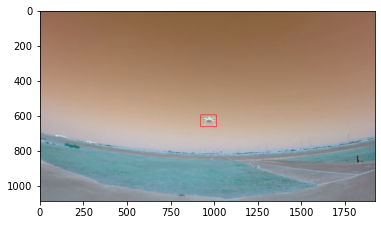

In [6]:
#test
image = './drone_data_split/drone_data_split/training/images/003-Vid5-frame104.png'
annotation = './drone_data_split/drone_data_split/training/labels/003-Vid5-frame104.txt'

image_file = cv2.imread(image)
with open(annotation, 'r') as f:
    for lines in f:
        annotations = lines.split()
        x1, y1, x2, y2 = [float(annotations[4]), float(annotations[5]), float(annotations[6]), float(annotations[7])]
        start_point = (int(x1), int(y1))
        end_point = (int(x2), int(y2))
        color = (255,0,0)
        img = cv2.rectangle(image_file, start_point, end_point, color , 2)
f.close()
imgplot = plt.imshow(img)

### Drawing BBOX on images of kitti annotation format

In [55]:
def draw_bbox_kitti(label_folder, image_folder):
    count = 0
    #making folder
    output_folder = os.path.join(image_folder, 'output')
    try:
        #Creating a folder
        if not os.path.exists(output_folder):
            os.makedirs(output_folder)
        #Raise an error if folder is not created
    except OSError:
        logging.error('Error creating directory')
    for files in os.listdir(label_folder):
        if files.endswith('.txt'):
            annotation_file = os.path.join(label_folder, files)
            name = os.path.splitext(files)[0]
            image_file = os.path.join(image_folder, name + '.png')
            if os.path.exists(image_file) == False:
                print(image_file + ' does not exists')
            else:
                image = cv2.imread(image_file)
                if os.stat(annotation_file).st_size == 0:
                    cv2.imwrite(os.path.join(output_folder, name + ".png"), image)
                    count += 1
                else:
                    with open(annotation_file, 'r') as f:
                        for lines in f:
                            annotations = lines.split()
                            x1, y1, x2, y2 = [float(annotations[4]), float(annotations[5]), float(annotations[6]), float(annotations[7])]
                            start_point = (int(x1), int(y1))
                            end_point = (int(x2), int(y2))
                            color = (255,0,0)
                            thickness = 2
                            img = cv2.rectangle(image, start_point, end_point, color , 2, thickness)
                            cv2.imwrite(os.path.join(output_folder, name + ".png"), img)
                    f.close()
                    #img = cv2.rectangle(image, start_point, end_point, color , 2, thickness)
                    count += 1
                    #cv2.imwrite(os.path.join(output_folder, name + ".png"), img)
    print('Total number of output files created are', count)

In [61]:
image_folder = './live-recording-2/trimmed1080p/13_Trim/frames/'
label_folder = './live-recording-2/trimmed1080p/13_Trim/annotations/'
draw_bbox_kitti(label_folder, image_folder)

Total number of output files created are 928


In [15]:
image_folder = './live-recording-2/0.5/livestream-0.50-28/frames/'
label_folder = './live-recording-2/0.5/livestream-0.50-28/annotations/'
draw_bbox_kitti(label_folder, image_folder)

Total number of output files created are 730


In [10]:
image_folder = './Video_Dataset/Test_Data/test_data/images/'
label_folder = './Video_Dataset/Test_Data/test_data/labels/'
draw_bbox_kitti(label_folder, image_folder)

Total number of output files created are 8994


In [3]:
image_folder = './drone_data_unsplit_resize/drone_data_unsplit_reszie/images/'
label_folder = './drone_data_unsplit_resize/drone_data_unsplit_reszie/labels/'
draw_bbox_kitti(label_folder, image_folder)

Total number of output files created are 6391


In [4]:
image_folder = './synData_unsplit/synData_unsplit/images/'
label_folder = './synData_unsplit/synData_unsplit/labels/'
draw_bbox_kitti(label_folder, image_folder)

KeyboardInterrupt: 

In [6]:
def draw_bbox_kitti_v2(label_folder, image_folder):
    count = 0
    #making folder
    dirname = os.path.dirname(label_folder)
    output_folder = os.path.join(dirname, 'images')
    try:
        #Creating a folder
        if not os.path.exists(output_folder):
            os.makedirs(output_folder)
        #Raise an error if folder is not created
    except OSError:
        logging.error('Error creating directory')
    for files in os.listdir(label_folder):
        if files.endswith('.txt'):
            annotation_file = os.path.join(label_folder, files)
            name = os.path.splitext(files)[0]
            image_file = os.path.join(image_folder, name + '.png')
            if os.path.exists(image_file) == False:
                print(image_file + ' does not exists')
                break
            else:
                image = cv2.imread(image_file)
                with open(annotation_file, 'r') as f:
                    for lines in f:
                        annotations = lines.split()
                        x1, y1, x2, y2 = [float(annotations[4]), float(annotations[5]), float(annotations[6]), float(annotations[7])]
                        start_point = (int(x1), int(y1))
                        end_point = (int(x2), int(y2))
                        color = (255,0,0)
                        thickness = 1
                f.close()
                img = cv2.rectangle(image, start_point, end_point, color , 2, thickness)
                count += 1
                cv2.imwrite(os.path.join(output_folder, name + ".png"), img)
    print('Total number of output files created are', count)

In [7]:
image_folder ='./Video_Dataset/Test_Data/labelled_test_data/labelled_test_data/images/'
label_folder = './inference_output/test data/od_frcnn_inference_combine_retrain(epoch_80)/labels'
draw_bbox_kitti_v2(label_folder, image_folder)

Total number of output files created are 9609
